In [38]:
from IPython.display import Audio, display

from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.io import wavfile
import seaborn as sns
import torchaudio

import sys
sys.path.append('../')
from data_loader.remove_silence import remove_silence_start_end, remove_silence_intervals

# PATHS

In [39]:
AUDIO_FOLDER = '../data/raw_data/french/'
print(os.path.exists(AUDIO_FOLDER))

True


# Remove silence

In [40]:
# Indices for choosing subfolder - anger/joy/...- and wav file.
index_subfolder = 0
index_file = 0

# Subfolders and wav filenames
audio_subfolders = [x for x in os.listdir(AUDIO_FOLDER) if os.path.isdir(os.path.join(AUDIO_FOLDER, x))]
subfolder = audio_subfolders[index_subfolder]
list_sound_files = [x for x in os.listdir(os.path.join(AUDIO_FOLDER, subfolder)) if x.endswith('.wav')]
filename = list_sound_files[index_file]

In [41]:
# Read sound file, create two new soundfiles using remove_silence_start_end and remove_silence_intervals
sound_path = os.path.join(AUDIO_FOLDER, subfolder, filename)
waveform, sample_rate = torchaudio.load(sound_path)
waveform_silence_start_end = remove_silence_start_end(waveform, 0.01)
waveform_silence_all = remove_silence_intervals(waveform, 0.01, 3600)

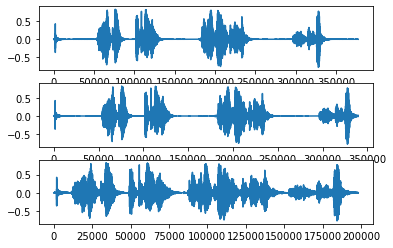

In [42]:
# Visualize audio wave
# For file index 0, we can see that:
#     - remove_silence_start_end (second row) only removes the silence at the end of the file
#     - remove_silence_intervals removes not only the silence at the end of the file, but also those longer silences
#      in between words
#     - Notice that some silences should not be removed, it can be part of the emotion ...
plt.figure()
plt.subplot(3,1,1)
plt.plot(np.squeeze(waveform))
plt.subplot(3,1,2)
plt.plot(np.squeeze(waveform_silence_start_end))
plt.subplot(3,1,3)
plt.plot(np.squeeze(waveform_silence_all))

In [43]:
# Display audio
display(Audio(np.squeeze(waveform.numpy()), rate=sample_rate))
display(Audio(np.squeeze(waveform_silence_start_end.numpy()), rate=sample_rate))
display(Audio(np.squeeze(waveform_silence_all.numpy()), rate=sample_rate))